In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Earth BG.jpg to Earth BG.jpg


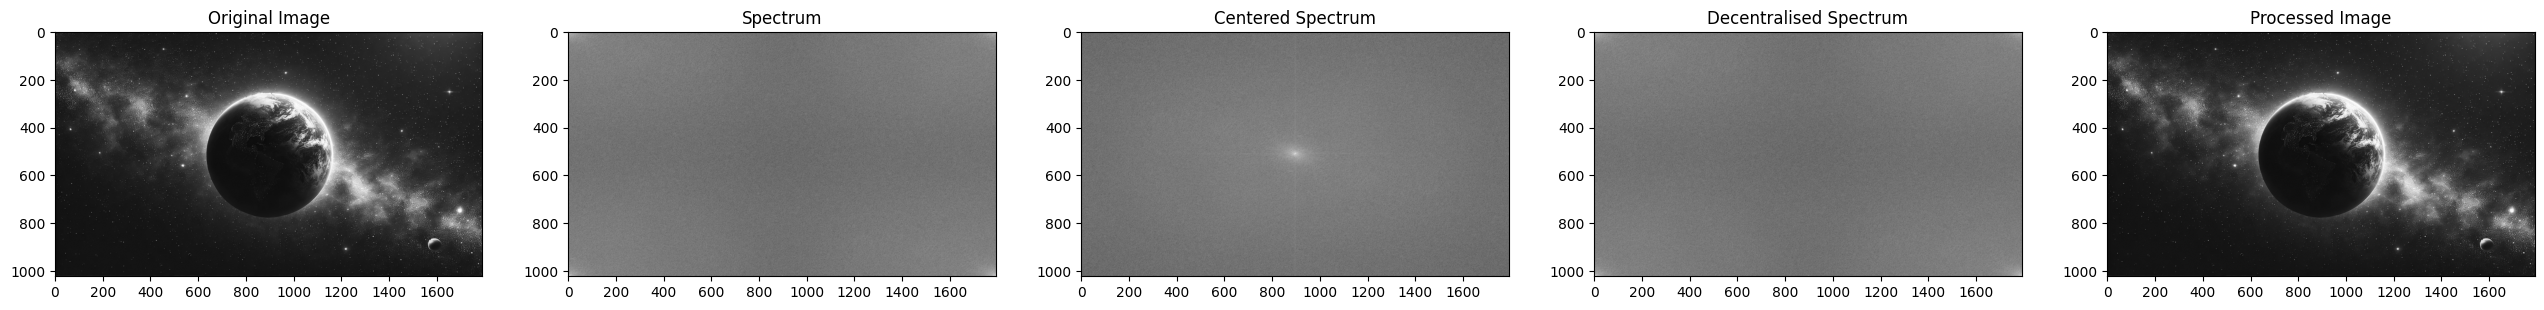

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
img=cv2.imread("Earth BG.jpg",0)
plt.subplot(151),plt.imshow(img, cmap="gray"),plt.title("Original Image")
original = np.fft.fft2(img)
plt.subplot(152),plt.imshow(np.log(1+np.abs(original)), cmap="gray"),plt.title("Spectrum")
center=np.fft.fftshift(original)
plt.subplot(153),plt.imshow(np.log(1+np.abs(center)), cmap="gray"),plt.title("Centered Spectrum")
inv_center= np.fft.ifftshift(center)
plt.subplot(154),plt.imshow(np.log(1+np.abs(inv_center)), cmap="gray"),plt.title("Decentralised Spectrum")
processed_img = np.fft.ifft2(inv_center)
plt.subplot(155),plt.imshow(np.abs(processed_img), cmap="gray"),plt.title("Processed Image")
plt.show()

In [ ]:
def distance(point1,point2):
  return sqrt((point1[0]-point2[0])**2+(point1[1]-point2[1])**2)

def idealFilterLP(D0 , imgShape):
  base = np.zeros(imgShape[:2])
  rows, cols = imgShape[:2]
  center = (rows/2, cols/2)
  for x in range(cols):
    for y in range(rows):
      if distance((y,x),center) < D0:
        base[y,x] = 1
  return base

def idealFilterHP(D0 , imgShape):
  base = np.ones(imgShape[:2])
  rows, cols = imgShape[:2]
  center = (rows/2, cols/2)
  for x in range(cols):
    for y in range(rows):
      if distance((y,x),center) < D0:
        base[y,x] = 0
  return base

def butterworthLP(D0 , imgShape, n):
  base = np.zeros(imgShape[:2])
  rows, cols = imgShape[:2]
  center = (rows/2, cols/2)
  for x in range(cols):
    for y in range(rows):
      base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
  return base

def butterworthHP(D0 , imgShape, n):
  base = np.ones(imgShape[:2])
  rows, cols = imgShape[:2]
  center = (rows/2 , cols/2)
  for x in range(cols):
    for y in range(rows):
      base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
  return 1-base

def gaussianLP(D0, imgShape):
  base = np.zeros(imgShape[:2])
  rows , cols = imgShape[:2]
  center = (rows/2, cols/2)
  for x in range(cols):
    for y in range(rows):
      base[y,x] = exp(-(distance((y,x),center)**2)/(2*(D0**2)))
  return base

def gaussianHP(D0 , imgShape):
  base= np.zeros(imgShape[:2])
  rows , cols = imgShape[:2]
  center = (rows/2, cols/2)
  for x in range(cols):
    for y in range(rows):
      base[y,x] = 1-exp(-(distance((y,x),center)**2)/(2*(D0**2)))
  return base

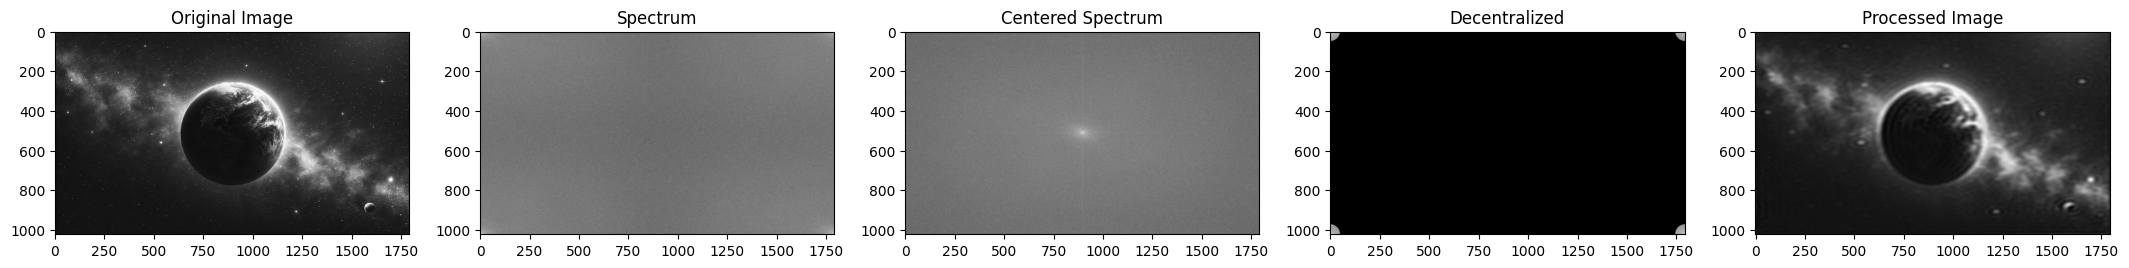

In [ ]:
#Add this at start of the code
import matplotlib.pyplot as plt
import cv2
import numpy as np
from math import sqrt, exp

#Apply Ideal Low Pass Filter
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
img= cv2.imread("Earth BG.jpg",0)
plt.subplot(161),plt.imshow(img, cmap="gray"),plt.title("Original Image")
original = np.fft.fft2(img)
plt.subplot(162),plt.imshow(np.log(1+np.abs(original)), cmap="gray"),plt.title("Spectrum")
center=np.fft.fftshift(original)
plt.subplot(163),plt.imshow(np.log(1+np.abs(center)), cmap="gray"),plt.title("Centered Spectrum")
LowPassCenter = center*idealFilterLP(50,img.shape)
LowPass= np.fft.ifftshift(LowPassCenter)
plt.subplot(164),plt.imshow(np.log(1+np.abs(LowPass)), cmap="gray"),plt.title("Decentralized")
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(165),plt.imshow(np.abs(inverse_LowPass), cmap="gray"),plt.title("Processed Image")
plt.show()


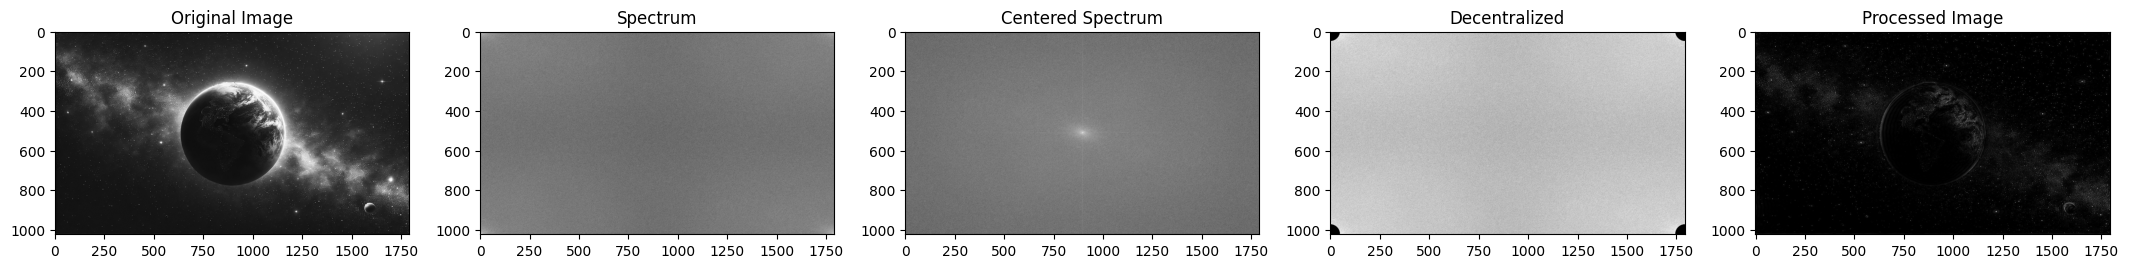

In [ ]:
#Ideal High Pass
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
img = cv2.imread("Earth BG.jpg", 0)
plt.subplot(161), plt.imshow(img, cmap="gray"), plt.title("Original Image")
original = np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1 + np.abs(original)), cmap="gray"), plt.title("Spectrum")
center = np.fft.fftshift(original)
plt.subplot(163), plt.imshow(np.log(1 + np.abs(center)), cmap="gray"), plt.title("Centered Spectrum")
HighPassCenter = center * idealFilterHP(50, img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(164), plt.imshow(np.log(1 + np.abs(HighPass)), cmap="gray"), plt.title("Decentralized")
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(165), plt.imshow(np.abs(inverse_HighPass), cmap="gray"), plt.title("Processed Image")
plt.show()

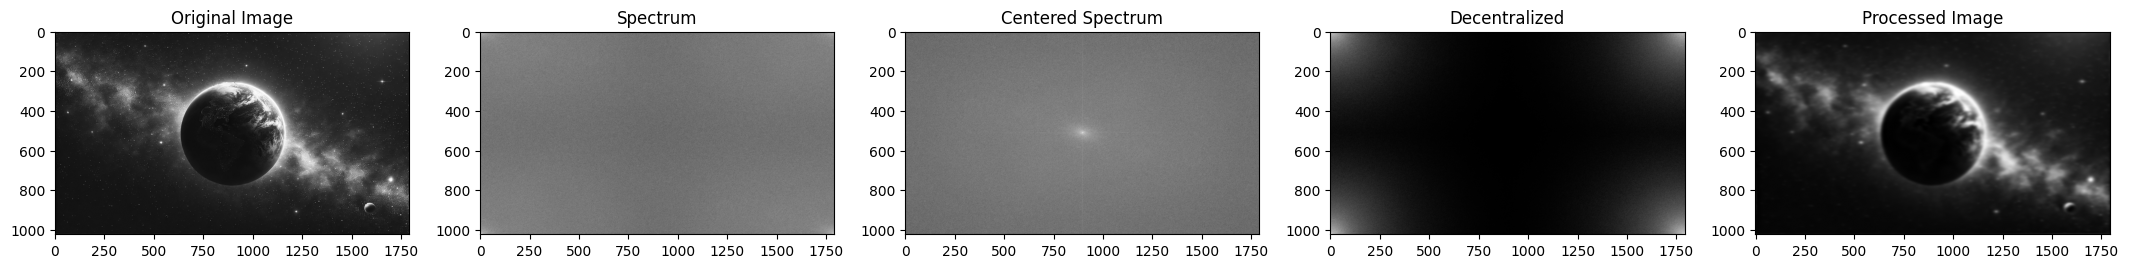

In [ ]:
#Butterworth Low Pass
plt.figure(figsize=(6.4 * 5, 4.8 * 5), constrained_layout=False)
img = cv2.imread("Earth BG.jpg", 0)
plt.subplot(161), plt.imshow(img, cmap="gray"), plt.title("Original Image")
original = np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1 + np.abs(original)), cmap="gray"), plt.title("Spectrum")
center = np.fft.fftshift(original)
plt.subplot(163), plt.imshow(np.log(1 + np.abs(center)), cmap="gray"), plt.title("Centered Spectrum")
ButterworthLPCenter = center * butterworthLP(50, img.shape, 2)
ButterworthLP = np.fft.ifftshift(ButterworthLPCenter)
plt.subplot(164), plt.imshow(np.log(1 + np.abs(ButterworthLP)), cmap="gray"), plt.title("Decentralized")
inverse_ButterworthLP = np.fft.ifft2(ButterworthLP)
plt.subplot(165), plt.imshow(np.abs(inverse_ButterworthLP), cmap="gray"), plt.title("Processed Image")
plt.show()

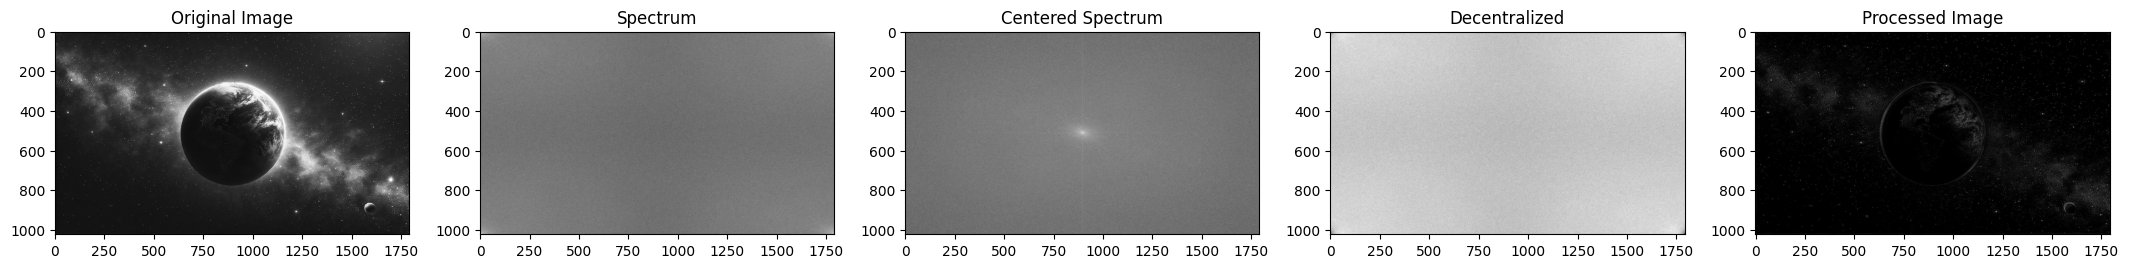

In [ ]:
#Butterworth High Pass
plt.figure(figsize=(6.4 * 5, 4.8 * 5), constrained_layout=False)
img = cv2.imread("Earth BG.jpg", 0)
plt.subplot(161), plt.imshow(img, cmap="gray"), plt.title("Original Image")
original = np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1 + np.abs(original)), cmap="gray"), plt.title("Spectrum")
center = np.fft.fftshift(original)
plt.subplot(163), plt.imshow(np.log(1 + np.abs(center)), cmap="gray"), plt.title("Centered Spectrum")
ButterworthHPCenter = center * butterworthHP(50, img.shape, 2)
ButterworthHP = np.fft.ifftshift(ButterworthHPCenter)
plt.subplot(164), plt.imshow(np.log(1 + np.abs(ButterworthHP)), cmap="gray"), plt.title("Decentralized")
inverse_ButterworthHP = np.fft.ifft2(ButterworthHP)
plt.subplot(165), plt.imshow(np.abs(inverse_ButterworthHP), cmap="gray"), plt.title("Processed Image")
plt.show()

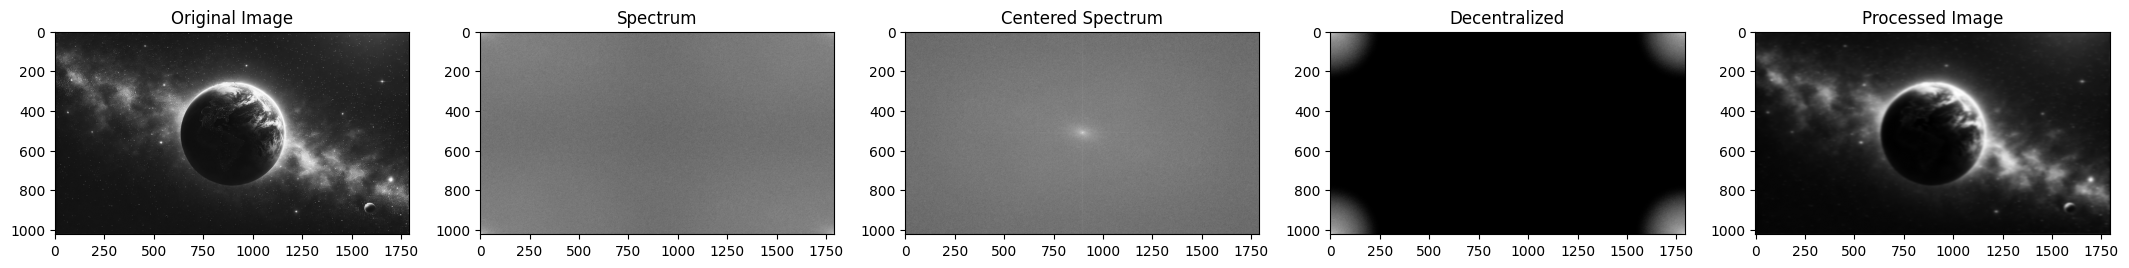

In [ ]:
#Gaussian Low Pass
plt.figure(figsize=(6.4 * 5, 4.8 * 5), constrained_layout=False)
img = cv2.imread("Earth BG.jpg", 0)
plt.subplot(161), plt.imshow(img, cmap="gray"), plt.title("Original Image")
original = np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1 + np.abs(original)), cmap="gray"), plt.title("Spectrum")
center = np.fft.fftshift(original)
plt.subplot(163), plt.imshow(np.log(1 + np.abs(center)), cmap="gray"), plt.title("Centered Spectrum")
GaussianLPCenter = center * gaussianLP(50, img.shape)
GaussianLP = np.fft.ifftshift(GaussianLPCenter)
plt.subplot(164), plt.imshow(np.log(1 + np.abs(GaussianLP)), cmap="gray"), plt.title("Decentralized")
inverse_GaussianLP = np.fft.ifft2(GaussianLP)
plt.subplot(165), plt.imshow(np.abs(inverse_GaussianLP), cmap="gray"), plt.title("Processed Image")
plt.show()

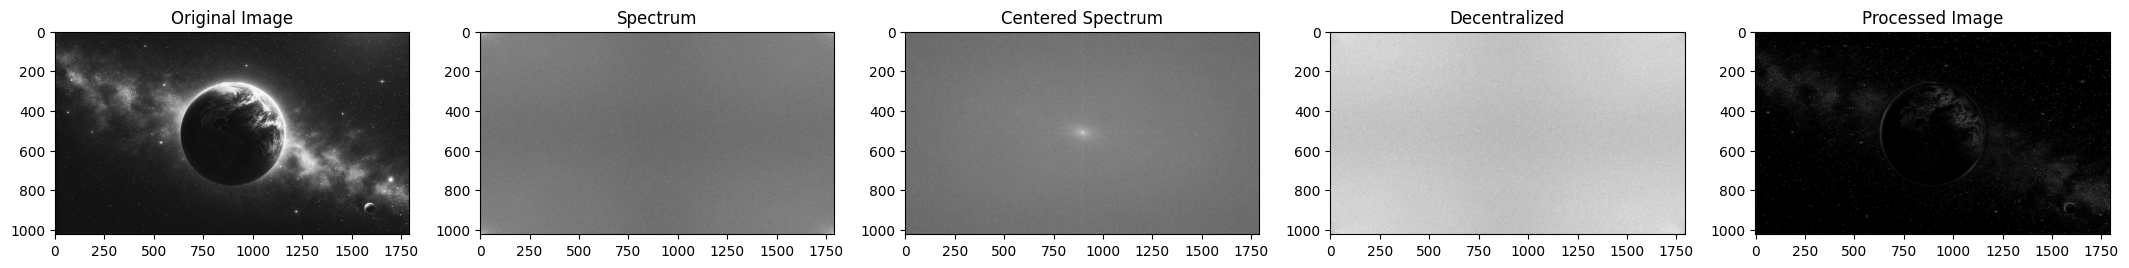

In [ ]:
#Gaussian High Pass
plt.figure(figsize=(6.4 * 5, 4.8 * 5), constrained_layout=False)
img = cv2.imread("Earth BG.jpg", 0)
plt.subplot(161), plt.imshow(img, cmap="gray"), plt.title("Original Image")
original = np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1 + np.abs(original)), cmap="gray"), plt.title("Spectrum")
center = np.fft.fftshift(original)
plt.subplot(163), plt.imshow(np.log(1 + np.abs(center)), cmap="gray"), plt.title("Centered Spectrum")
GaussianHPCenter = center * gaussianHP(50, img.shape)
GaussianHP = np.fft.ifftshift(GaussianHPCenter)
plt.subplot(164), plt.imshow(np.log(1 + np.abs(GaussianHP)), cmap="gray"), plt.title("Decentralized")
inverse_GaussianHP = np.fft.ifft2(GaussianHP)
plt.subplot(165), plt.imshow(np.abs(inverse_GaussianHP), cmap="gray"), plt.title("Processed Image")
plt.show()